In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pricing = pd.read_csv(
    "C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/car_insurance_pricing_analytics/data/processed/discount_impact_summary.csv"
)

bucket = pd.read_csv(
    "C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/car_insurance_pricing_analytics/data/processed/discount_bucket_impact.csv"
)

elasticity = pd.read_csv(
   "C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/car_insurance_pricing_analytics/data/processed/elasticity_profit_summary.csv"
)


In [5]:
pricing

,discount_applied,policies,avg_premium,avg_margin,total_margin
0,No Discount,1309,14700.611154,5816.846218,7.614252e+06
1,Discounted,1691,13202.871082,5275.306444,8.920543e+06


In [7]:
bucket

,discount_bucket,policies,avg_discount,avg_margin,total_margin
0,High,305,15.0,4752.812961,1.449608e+06
1,Low,771,5.0,5473.957701,4.220421e+06
2,Medium,615,10.0,5285.388385,3.250514e+06
3,No Discount,1309,0.0,5816.846218,7.614252e+06


In [9]:
elasticity

,price_sensitivity_zone,policies,loss_policies,avg_margin
0,Highly Discounted,739,51,4236.594060
1,Competitive,728,42,5323.181702
2,Market Priced,823,46,5938.940453
3,Overpriced,710,48,6184.684774


In [11]:
kpis = {
    "Total Policies": pricing["policies"].sum(),
    "Discounted Policies": pricing.loc[
        pricing["discount_applied"] == "Discounted",
        "policies"
    ].values[0],
    "Avg Margin (Discounted)": pricing.loc[
        pricing["discount_applied"] == "Discounted",
        "avg_margin"
    ].values[0],
    "Avg Margin (No Discount)": pricing.loc[
        pricing["discount_applied"] == "No Discount",
        "avg_margin"
    ].values[0],
}
pd.DataFrame.from_dict(kpis, orient="index", columns=["Value"])


,Value
Total Policies,3000.000000
Discounted Policies,1691.000000
Avg Margin (Discounted),5275.306444
Avg Margin (No Discount),5816.846218


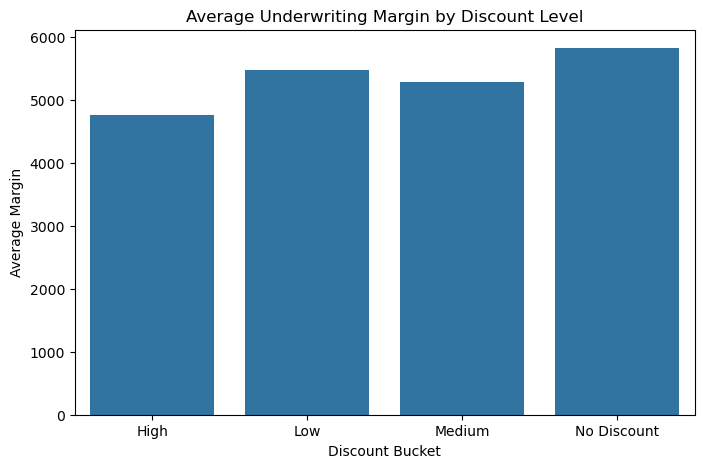

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=bucket,
    x="discount_bucket",
    y="avg_margin"
)
plt.title("Average Underwriting Margin by Discount Level")
plt.ylabel("Average Margin")
plt.xlabel("Discount Bucket")
plt.show()


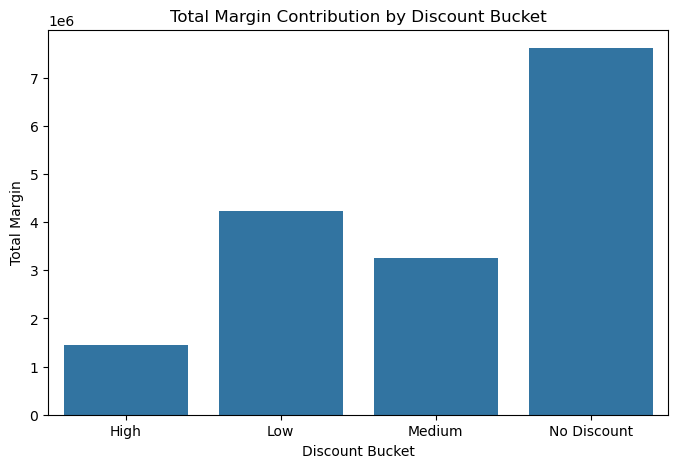

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=bucket,
    x="discount_bucket",
    y="total_margin"
)
plt.title("Total Margin Contribution by Discount Bucket")
plt.ylabel("Total Margin")
plt.xlabel("Discount Bucket")
plt.show()


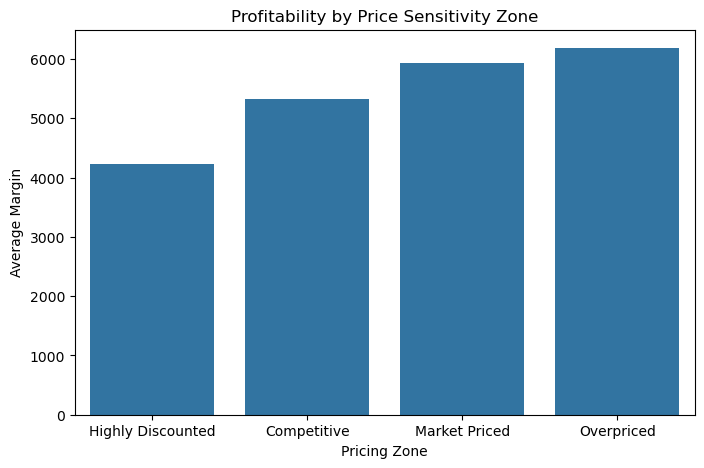

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=elasticity,
    x="price_sensitivity_zone",
    y="avg_margin"
)
plt.title("Profitability by Price Sensitivity Zone")
plt.ylabel("Average Margin")
plt.xlabel("Pricing Zone")
plt.show()


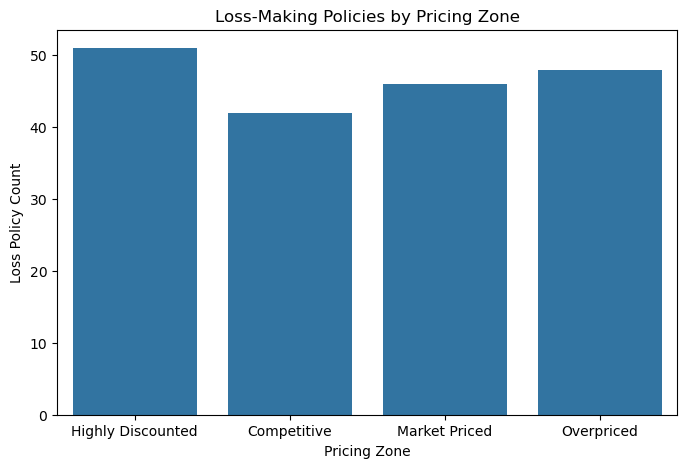

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=elasticity,
    x="price_sensitivity_zone",
    y="loss_policies"
)
plt.title("Loss-Making Policies by Pricing Zone")
plt.ylabel("Loss Policy Count")
plt.xlabel("Pricing Zone")
plt.show()


In [21]:
print("""
EXECUTIVE INSIGHTS:
• Discounts significantly improve pricing competitiveness
• Discounts above 10% materially erode underwriting margin
• Highly discounted pricing zones carry disproportionate loss risk
• Optimal pricing lies in competitive but disciplined discount bands
""")



EXECUTIVE INSIGHTS:
• Discounts significantly improve pricing competitiveness
• Discounts above 10% materially erode underwriting margin
• Highly discounted pricing zones carry disproportionate loss risk
• Optimal pricing lies in competitive but disciplined discount bands

